In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient
from alpha_vantage.timeseries import TimeSeries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,8)

In [2]:
ALPHA_VANTAGE_API_KEY = open('key.txt', 'r').read()
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')

In [3]:
try:
    server = MongoClient('mongodb://localhost:27017/')
    print('Connected successfully :D')
except:
    print('Could not connect to MongoDB :(')

db = server['trading']
companies = server['companies']

Connected successfully :D


In [4]:
df = pd.DataFrame(list(db.companies.find({})))
df = df.drop('_id', axis=1)
df = df.sort_values('Date', ignore_index=True)
df

,Company,Date,Open,High,Low,Close,Volume
0,MSFT,1999-11-01,93.2500,94.1900,92.1200,92.3700,26630600
1,IBM,1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
2,AAPL,1999-11-01,80.0000,80.6900,77.3700,77.6200,2487300
3,AAPL,1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600
4,IBM,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
...,...,...,...,...,...,...,...
15766,MSFT,2020-09-21,197.1900,202.7100,196.3800,202.5400,39839657
15767,IBM,2020-09-21,120.4800,120.7000,118.5800,120.2500,5311441
15768,AAPL,2020-09-22,112.6800,112.8600,109.1600,111.8100,181592150
15769,MSFT,2020-09-22,205.0600,208.1000,202.0750,207.4200,33223556


## IBM - Stock Price comparison by months (High & Low) (Open & Close)

In [5]:
ibm = pd.DataFrame(list(db.companies.find({ 'Company': 'IBM' })))
ibm = ibm.drop('_id', axis=1)
ibm = ibm.sort_values('Date', ignore_index=True)
ibm

,Company,Date,Open,High,Low,Close,Volume
0,IBM,1999-11-01,98.5000,98.8100,96.3700,96.7500,9551800
1,IBM,1999-11-02,96.7500,96.8100,93.6900,94.8100,11105400
2,IBM,1999-11-03,95.8700,95.9400,93.5000,94.3700,10369100
3,IBM,1999-11-04,94.4400,94.4400,90.0000,91.5600,16697600
4,IBM,1999-11-05,92.7500,92.9400,90.1900,90.2500,13737600
...,...,...,...,...,...,...,...
5252,IBM,2020-09-16,122.7100,125.8200,122.7100,124.2200,3789458
5253,IBM,2020-09-17,122.6200,125.5500,121.9700,124.9200,3171262
5254,IBM,2020-09-18,124.2600,124.9200,122.6500,122.7600,5391570
5255,IBM,2020-09-21,120.4800,120.7000,118.5800,120.2500,5311441


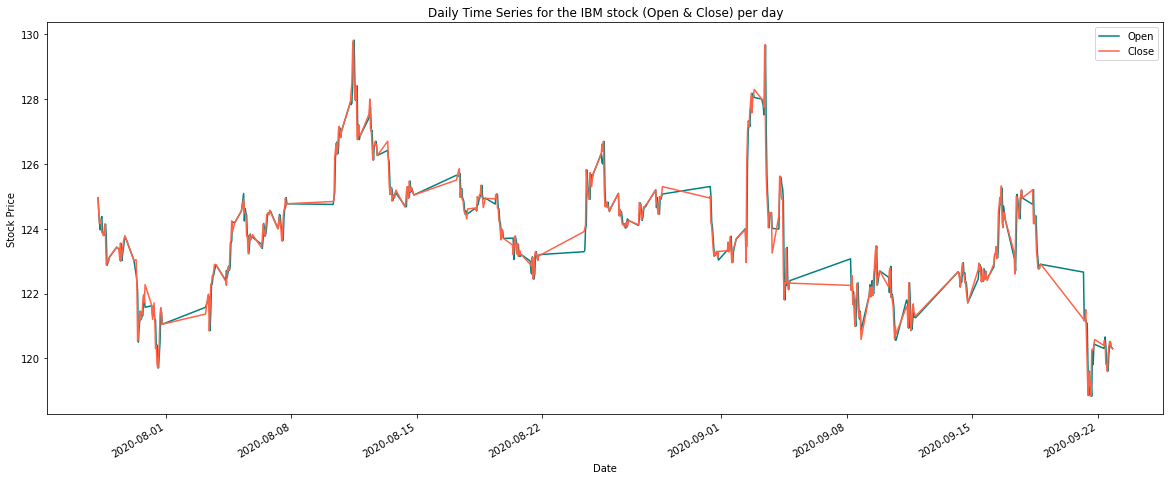

In [22]:
# data, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
# data, meta_data = ts.get_intraday(symbol='IBM', interval='60min', outputsize='full')
data, meta_data = ts.get_daily(symbol='IBM')
data['1. open'].plot(color='teal', label='Open')
data['4. close'].plot(color='tomato', label='Close')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Open & Close) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

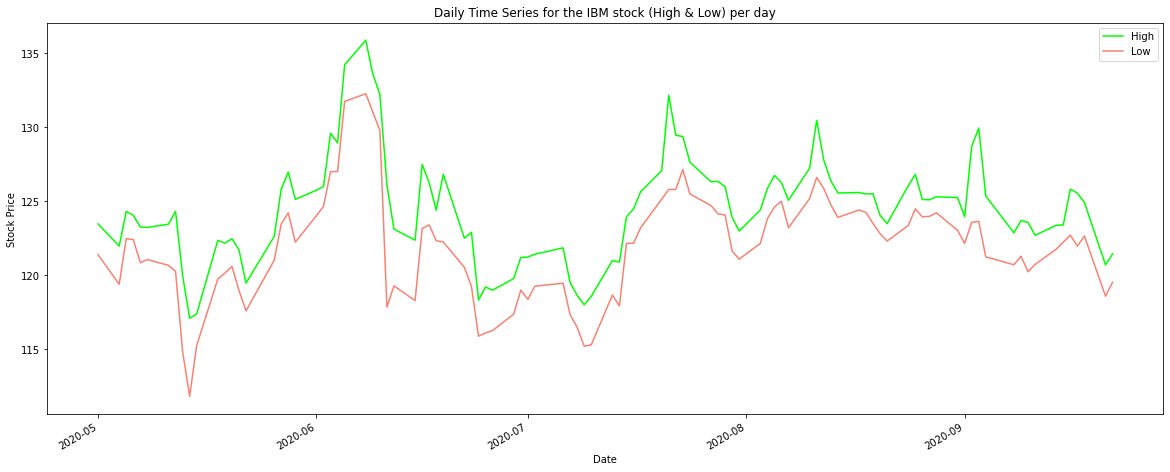

In [7]:
data['2. high'].plot(color='lime', label='High')
data['3. low'].plot(color='salmon', label='Low')
plt.legend()
plt.title('Daily Time Series for the IBM stock (High & Low) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## IBM - Volume

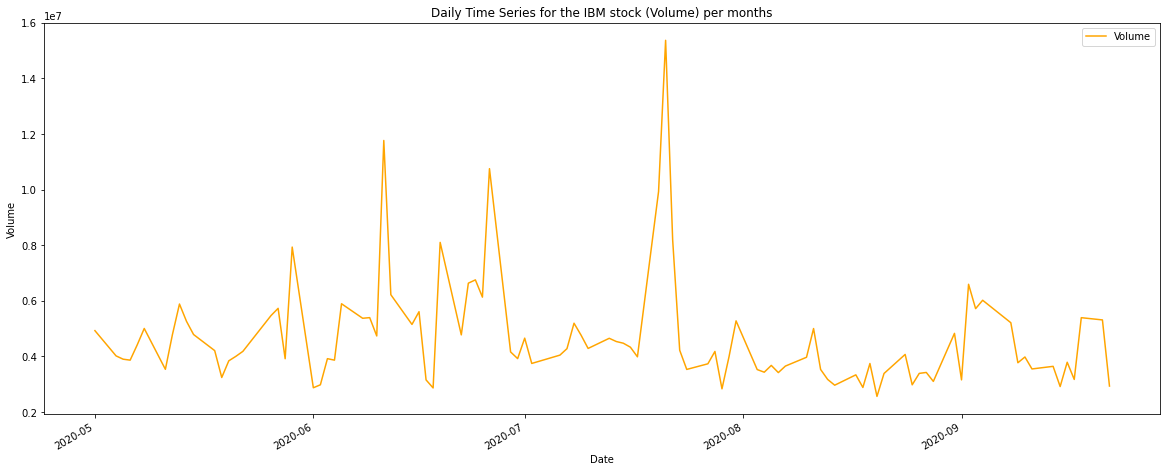

In [8]:
data['5. volume'].plot(color='orange', label='Volume')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Volume) per months')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## Microsoft - Stock Price comparison by months (High & Low) (Open & Close)

In [9]:
msft = pd.DataFrame(list(db.companies.find({ 'Company': 'MSFT' })))
msft = msft.drop('_id', axis=1)
msft = msft.sort_values('Date', ignore_index=True)
msft

,Company,Date,Open,High,Low,Close,Volume
0,MSFT,1999-11-01,93.2500,94.1900,92.1200,92.3700,26630600
1,MSFT,1999-11-02,92.7500,94.5000,91.9400,92.5600,23174500
2,MSFT,1999-11-03,92.9400,93.5000,91.5000,92.0000,22258500
3,MSFT,1999-11-04,92.3100,92.7500,90.3100,91.7500,27119700
4,MSFT,1999-11-05,91.8100,92.8700,90.5000,91.5600,35083700
...,...,...,...,...,...,...,...
5252,MSFT,2020-09-16,210.6200,210.6500,204.6400,205.0500,26372464
5253,MSFT,2020-09-17,200.0500,204.3300,199.9600,202.9100,34011257
5254,MSFT,2020-09-18,202.8000,203.6500,196.2500,200.3900,55225326
5255,MSFT,2020-09-21,197.1900,202.7100,196.3800,202.5400,39839657


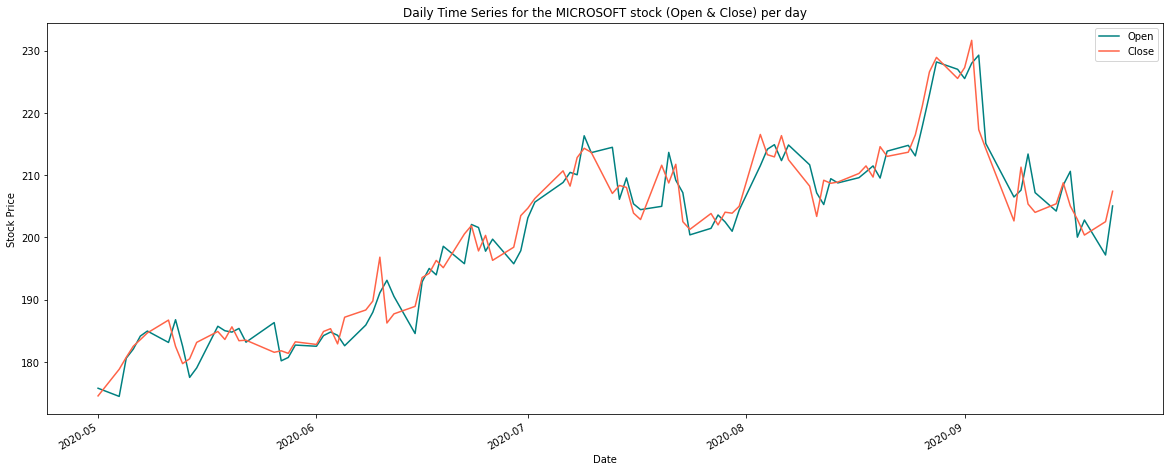

In [10]:
# dataMsft, meta_data = ts.get_daily(symbol='MSFT', outputsize='full')
# dataMsft, meta_data = ts.get_intraday(symbol='MSFT', interval='60min', outputsize='full')
dataMsft, meta_data = ts.get_daily(symbol='MSFT')
dataMsft['1. open'].plot(color='teal', label='Open')
dataMsft['4. close'].plot(color='tomato', label='Close')
plt.legend()
plt.title('Daily Time Series for the MICROSOFT stock (Open & Close) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

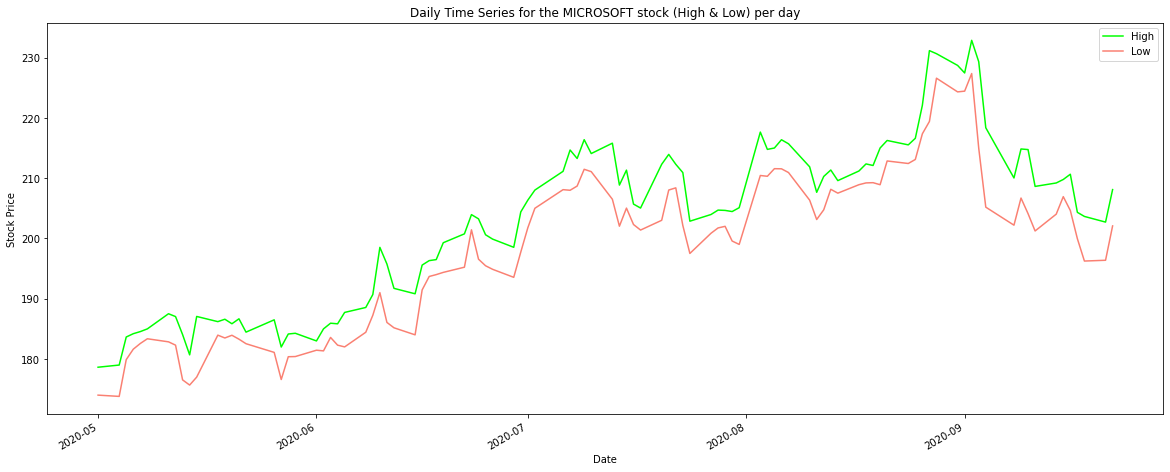

In [11]:
dataMsft['2. high'].plot(color='lime', label='High')
dataMsft['3. low'].plot(color='salmon', label='Low')
plt.legend()
plt.title('Daily Time Series for the MICROSOFT stock (High & Low) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## Microsoft - Volume

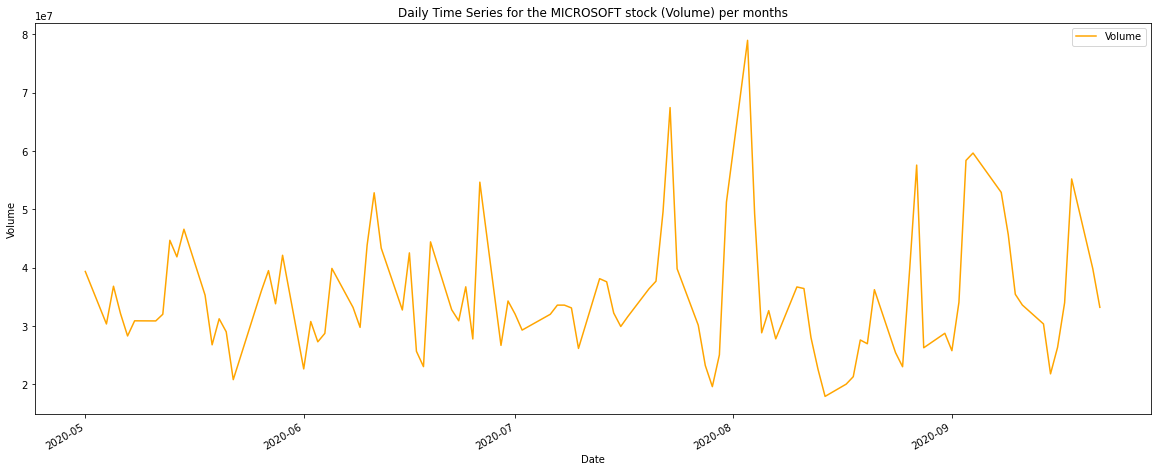

In [12]:
dataMsft['5. volume'].plot(color='orange', label='Volume')
plt.legend()
plt.title('Daily Time Series for the MICROSOFT stock (Volume) per months')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

## Apple - Stock Price comparison by months (High & Low) (Open & Close)

In [13]:
apple = pd.DataFrame(list(db.companies.find({ 'Company': 'AAPL' })))
apple = apple.drop('_id', axis=1)
apple = apple.sort_values('Date', ignore_index=True)
apple

,Company,Date,Open,High,Low,Close,Volume
0,AAPL,1999-11-01,80.0000,80.6900,77.3700,77.6200,2487300
1,AAPL,1999-11-02,78.0000,81.6900,77.3100,80.2500,3564600
2,AAPL,1999-11-03,81.6200,83.2500,81.0000,81.5000,2932700
3,AAPL,1999-11-04,82.0600,85.3700,80.6200,83.6200,3384700
4,AAPL,1999-11-05,84.6200,88.3700,84.0000,88.3100,3721500
...,...,...,...,...,...,...,...
5252,AAPL,2020-09-16,115.2300,116.0000,112.0400,112.1300,155026675
5253,AAPL,2020-09-17,109.7200,112.2000,108.7100,110.3400,178010968
5254,AAPL,2020-09-18,110.4000,110.8800,106.0900,106.8400,287104882
5255,AAPL,2020-09-21,104.5400,110.1900,103.1000,110.0800,195713815


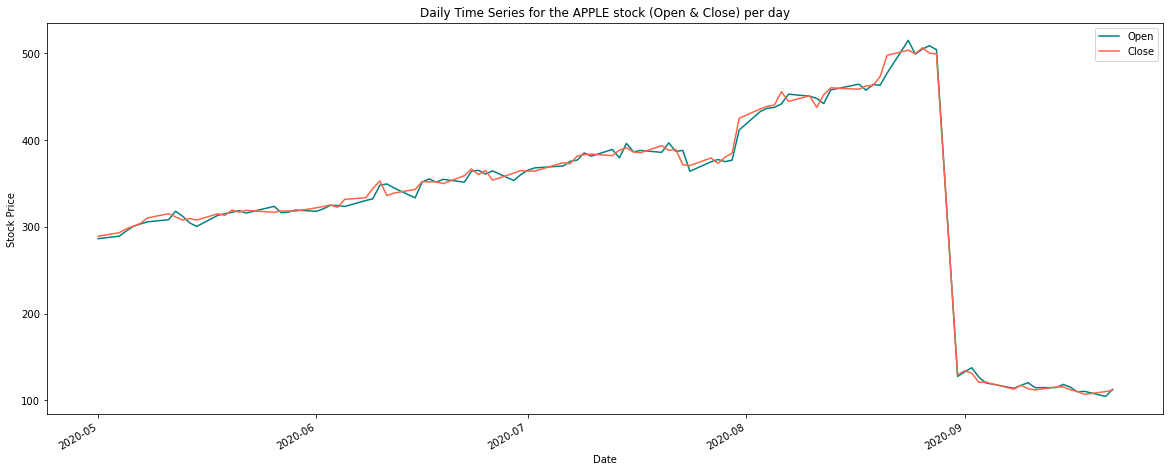

In [19]:
# dataApple, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')
# dataApple, meta_data = ts.get_intraday(symbol='AAPL', interval='60min', outputsize='full')
dataApple, meta_data = ts.get_daily(symbol='AAPL')
dataApple['1. open'].plot(color='teal', label='Open')
dataApple['4. close'].plot(color='tomato', label='Close')
plt.legend()
plt.title('Daily Time Series for the APPLE stock (Open & Close) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

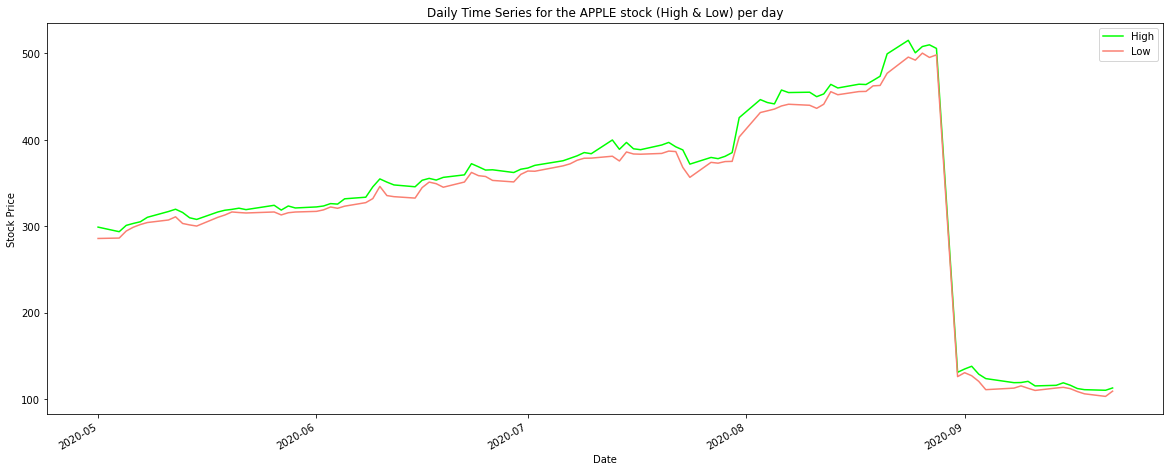

In [15]:
dataApple['2. high'].plot(color='lime', label='High')
dataApple['3. low'].plot(color='salmon', label='Low')
plt.legend()
plt.title('Daily Time Series for the APPLE stock (High & Low) per day')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

## Apple - Volume

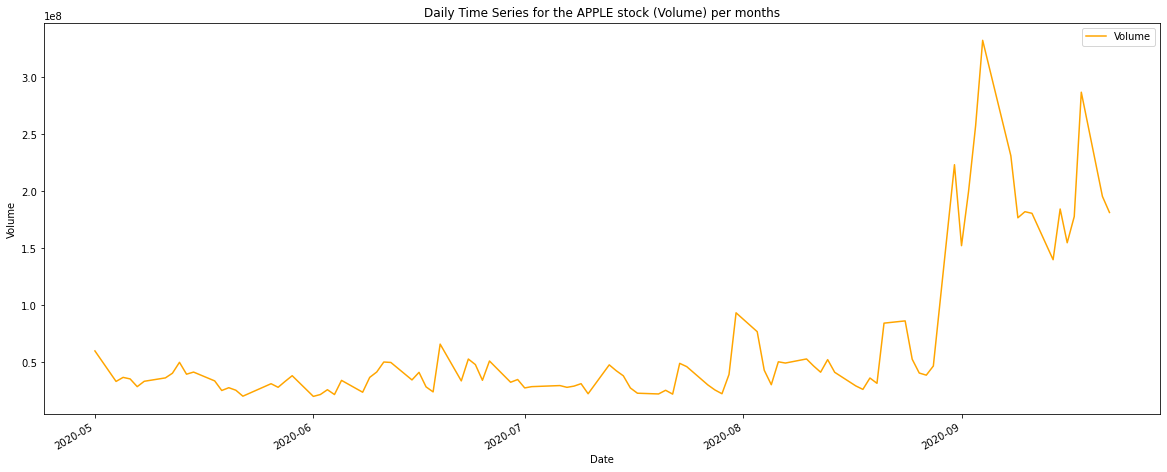

In [16]:
dataApple['5. volume'].plot(color='orange', label='Volume')
plt.legend()
plt.title('Daily Time Series for the IBM stock (Volume) per months')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()